# Assignment on Customer Segmentation with K-Means CLustering


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Dataset

In [14]:
#Using/importing the customer Mall Dataset
df= pd.read_csv("C:\\Users\\HomePC\\Downloads\\Mall_Customers.csv")

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Explore the Dataset

In [18]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [19]:
#Checking for empty data sets and types

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
clustering_features = df[['Spending Score (1-100)', 'Annual Income (k$)','Age']]

In [23]:
clustering_features.head()

,Spending Score (1-100),Annual Income (k$),Age
0,39,15,19
1,81,15,21
2,6,16,20
3,77,16,23
4,40,17,31


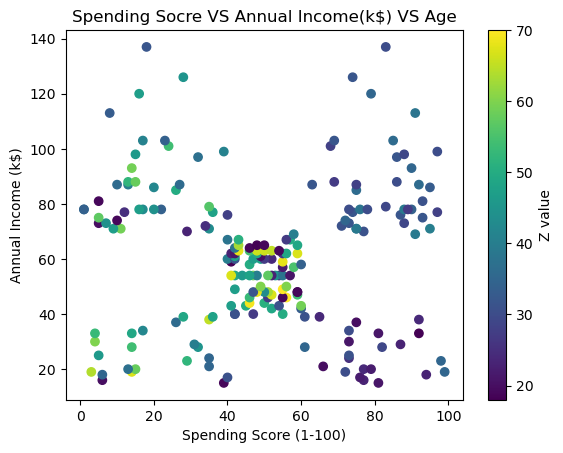

In [25]:
#visualize and plot data of Spending score , Annual Income, Age
plt.scatter(clustering_features['Spending Score (1-100)'], clustering_features['Annual Income (k$)'], c=clustering_features['Age'], cmap='viridis') 
plt.colorbar(label='Z value')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Spending Socre VS Annual Income(k$) VS Age')
plt.show()

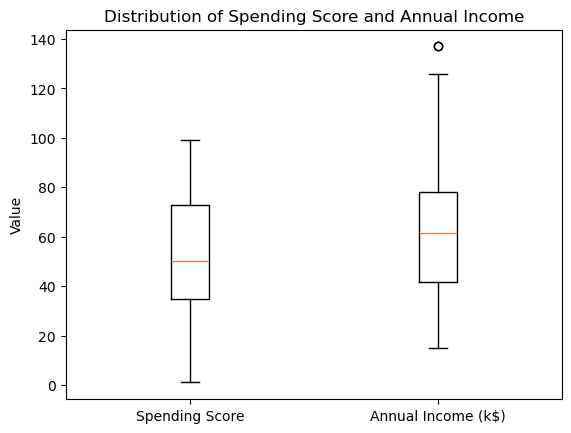

In [28]:
#visualization of a bloxplot of Spending score vs Annual Income
plt.boxplot([
    clustering_features['Spending Score (1-100)'],
    clustering_features['Annual Income (k$)']
])

plt.xticks([1, 2], ['Spending Score', 'Annual Income (k$)'])
plt.ylabel('Value')
plt.title('Distribution of Spending Score and Annual Income')
plt.show()


In [30]:
#Features for Cluster Variables
clustering_features = df[['Spending Score (1-100)', 'Annual Income (k$)']]

# Optimal Number of Clusters - Elbow Method

In [35]:
# Test different numbers of clusters

k_range = range(2, 11)
empty_inertias = []

for k in k_range:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the model
    kmeans.fit(clustering_features)

    # Store the inertia (within-cluster sum of squares)
    empty_inertias.append(kmeans.inertia_)

    print(f"k={k}: Inertia = {kmeans.inertia_:.2f}")
    


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

k=2: Inertia = 181363.60
k=3: Inertia = 106348.37
k=4: Inertia = 73679.79
k=5: Inertia = 44448.46


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=6: Inertia = 37233.81
k=7: Inertia = 30241.34
k=8: Inertia = 25036.42
k=9: Inertia = 21916.79
k=10: Inertia = 20072.07


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


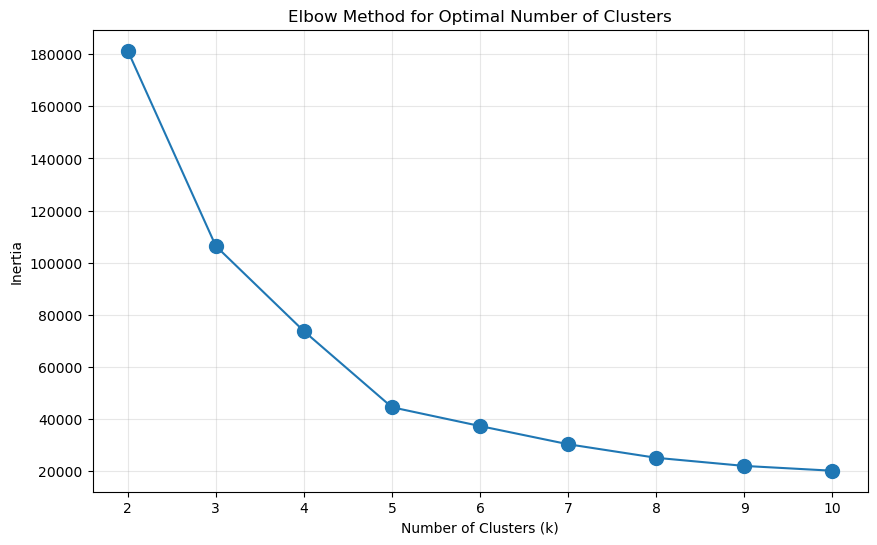

In [36]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, empty_inertias, 'o-', markersize=10)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

## Using the 'Elbow' method, we can see that the K-(no of clusters) is 5, because that is the steepest part (elbow joint) of the plot

# Find Optimal Clusters Using Silhouette Score:

In [37]:
silhouette_scores = []

for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(clustering_features)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(clustering_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")

C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=2: Silhouette Score = 0.297
k=3: Silhouette Score = 0.468
k=4: Silhouette Score = 0.493


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=5: Silhouette Score = 0.554
k=6: Silhouette Score = 0.540
k=7: Silhouette Score = 0.529


C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k=8: Silhouette Score = 0.455
k=9: Silhouette Score = 0.456
k=10: Silhouette Score = 0.441


In [38]:
print(cluster_labels[:10])

[5 3 0 3 5 3 0 3 0 3]


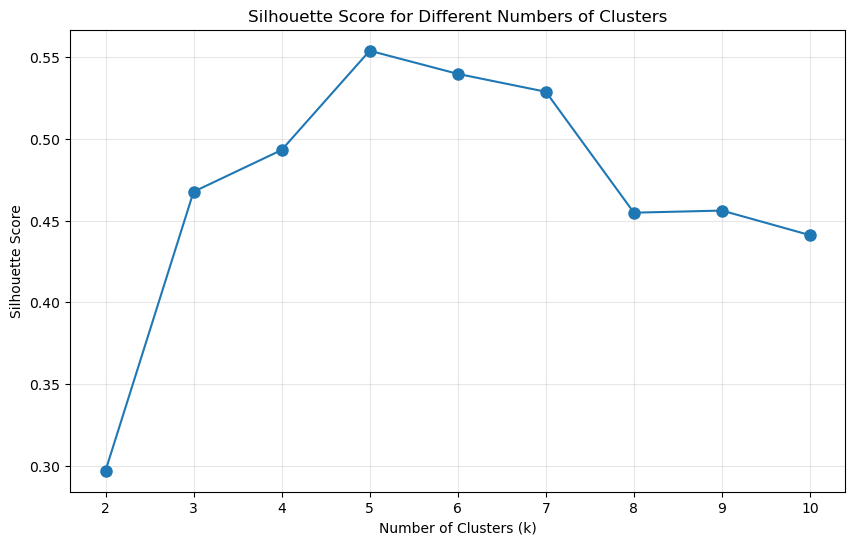

In [39]:
# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

# Building the Final K-means Model

In [56]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Create the final model
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

# Fit the model and get cluster labels
cluster_labels = final_kmeans.fit_predict(clustering_features)

C:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
cluster_labels[:10]

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2], dtype=int32)

In [16]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['predicted_cluster'] = cluster_labels

In [51]:
df_clustered["predicted_cluster"].unique()

array([4, 2, 0, 1, 3], dtype=int32)

In [44]:
df_clustered.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),predicted_cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


# Analyzing the no of clusters

In [52]:
# Cluster distribution
cluster_counts = pd.Series(cluster_labels).value_counts()
print(cluster_counts)

0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


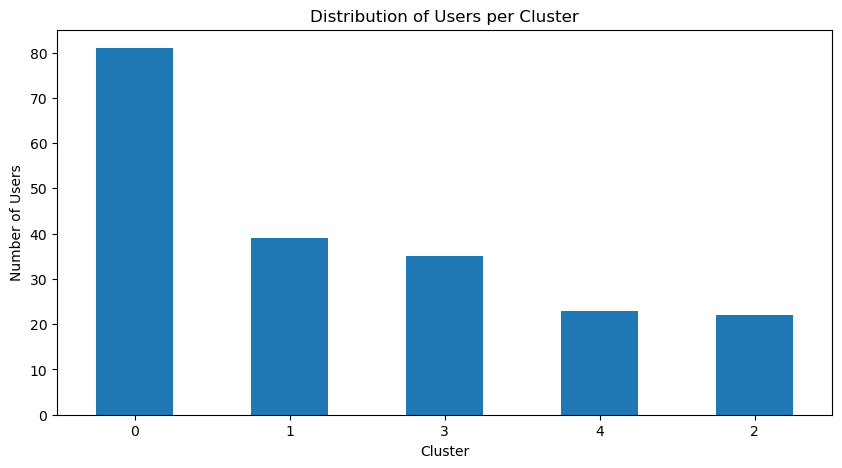

In [53]:
plt.figure(figsize=(10, 5))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Users per Cluster')
plt.xticks(rotation=0)
plt.show()

In [54]:
cluster_characteristics = df_clustered.groupby('predicted_cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
display(cluster_characteristics)

,Annual Income (k$),Spending Score (1-100)
predicted_cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


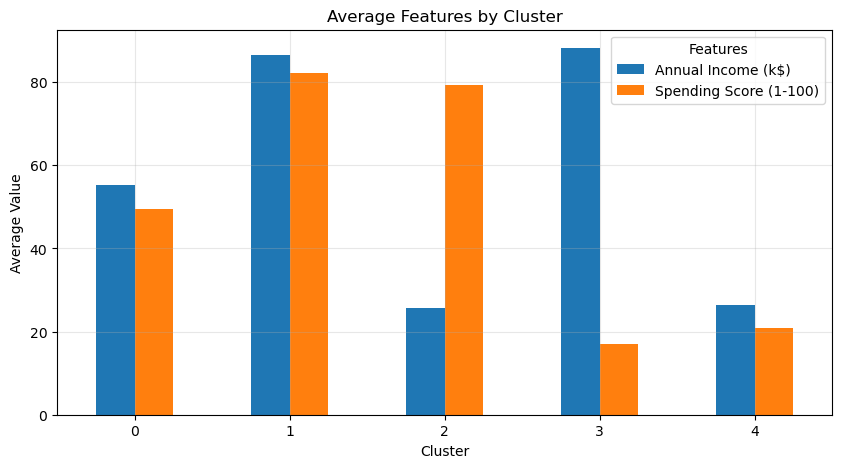

In [57]:
# Plot: Feature comparison by cluster
fig, axes = plt.subplots(figsize=(10, 5))
cluster_characteristics.plot(kind='bar', ax=axes)
axes.set_xlabel('Cluster')
axes.set_ylabel('Average Value')
axes.set_title('Average Features by Cluster')
axes.tick_params(axis='x', rotation=0)
axes.legend(title='Features')
axes.grid(True, alpha=0.3)
plt.show()

## Optimal Number of K Clusters from using Elbow method and Silhouette is 5. Therefore, Cluster 0 = Higher Income , Cluster 1 = Higher Income, Cluster 2 = Very High Spending , Cluster 3 = Very High Income , Cluster 4 = Moderate spending leading to Higher Income